# Emotion Detector using streamlit
o. Dectecting text
o. Text Classifier

In [1]:
# Import Packages

import joblib
# Exploratory Data Anaylsis (EDA) Packages
import pandas as pd
import numpy as np

# Visualization Packages 
import seaborn as sns
import matplotlib.pyplot as plt

# Text Cleaning
import neattext.functions as nfx

# Machine Learning Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings()

In [2]:
# load datasets
df = pd.read_csv('../emotion-detection-app/data/emotion_dataset_raw.csv')
df

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."


In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [5]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN I HATE FUNERALS THIS REALLY SHOWS ME HOW BLESSED I AM
3,joy,"Such an eye ! The true hazel eye-and so brilliant ! Regular features , open countenance , with a complexion , Oh ! What a bloom of full health , and such a pretty height and size ; such a firm and upright figure ! There is health , not merely in her bloom , but in her air , her head , her glance . One hears sometimes of a child being ' the picture of health ' ; now , she always gives me the idea of being the complete picture of grown-up health . She is loveliness itself ."
4,joy,"@Iluvmiasantos ugh babe.. hugggzzz for u .! babe naamazed nga ako e babe e, despite nega's mas pinaramdam at fil ko ang"


In [6]:
# counting rows for emotion types
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

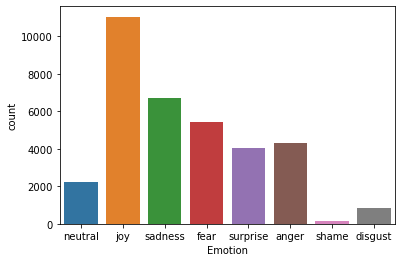

In [7]:
# plot count of emotion
sns.countplot(x='Emotion', data = df)
plt.show()

In [8]:
df.shape

(34792, 2)

In [9]:
df.drop_duplicates().shape

(31162, 2)

In [10]:
df = df.drop_duplicates()

In [11]:
df.drop_duplicates(['Text']).shape

(31110, 2)

In [12]:
# Data cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [13]:
# removing stopwords
df['CleanText']=df['Text'].apply(nfx.remove_stopwords)

<ipython-input-13-f516ead3c577>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CleanText']=df['Text'].apply(nfx.remove_stopwords)


In [14]:
# removing user handels
df['CleanText']=df['CleanText'].apply(nfx.remove_userhandles)

<ipython-input-14-5d074b40025e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CleanText']=df['CleanText'].apply(nfx.remove_userhandles)


In [15]:
# removing numbers
df['CleanText']=df['CleanText'].apply(nfx.remove_numbers)

<ipython-input-15-6ae16cea33e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CleanText']=df['CleanText'].apply(nfx.remove_numbers)


In [16]:
df.head()

,Emotion,Text,CleanText
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN I HATE FUNERALS THIS REALLY SHOWS ME HOW BLESSED I AM,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS SHOWS BLESSED
3,joy,"Such an eye ! The true hazel eye-and so brilliant ! Regular features , open countenance , with a complexion , Oh ! What a bloom of full health , and such a pretty height and size ; such a firm and upright figure ! There is health , not merely in her bloom , but in her air , her head , her glance . One hears sometimes of a child being ' the picture of health ' ; now , she always gives me the idea of being the complete picture of grown-up health . She is loveliness itself .","eye ! true hazel eye-and brilliant ! Regular features , open countenance , complexion , Oh ! bloom health , pretty height size ; firm upright figure ! health , merely bloom , air , head , glance . hears child ' picture health ' ; , gives idea complete picture grown-up health . loveliness ."
4,joy,"@Iluvmiasantos ugh babe.. hugggzzz for u .! babe naamazed nga ako e babe e, despite nega's mas pinaramdam at fil ko ang","ugh babe.. hugggzzz u .! babe naamazed nga ako e babe e, despite nega's mas pinaramdam fil ko ang"


In [17]:
class md:
  bold = '\033[1m'
  end = '\033[0m'

In [18]:
def buildModels(x_train, x_test, y_train, y_test):

    dfs = results = names = []
    
    models = [
      ('LGR', LogisticRegression()),
      ('RFC', RandomForestClassifier()),
      ('KNN', KNeighborsClassifier()),
      ('SVM', SVC(probability=True)),
      ('XGB', XGBClassifier()),
      ('ADA', AdaBoostClassifier())
    ]
    
    modelScore = []
    for model in models:
        print(md.bold + "========================================  " + model[0] + "  ========================================" + md.end)
        # Creating pipeline
        print(md.bold + "Creating Pipeline..." + md.end)
        pipeline = Pipeline(steps=[('cv', CountVectorizer()), model])
        
        # Training model
        print(md.bold + "Training Model..." + md.end)
        pipeline.fit(x_train, y_train)
        
        # Getting Results
        print(md.bold + "Data:" + md.end)
        print(pipeline.predict(["I am broke"]))
        Score = pipeline.score(x_test, y_test)
        print("Score:", Score)
        modelScore.append(Score)
        
        # Storing model
        print(md.bold + "Storing Model..." + md.end)
        with open(f"../models/{model[0]}.pkl", "wb") as ec:
            joblib.dump(pipeline, ec)
        print(md.bold + "Process Complete!!\n\n\n" + md.end)
    print("Highest accuracy:", models[modelScore.index(max(modelScore))])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df['CleanText'], df['Emotion'], test_size=0.2, random_state=30)

In [20]:
buildModels(x_train, x_test, y_train, y_test)

========================================  LGR  ========================================
Creating Pipeline...
Training Model...


C:\Users\SRIVARI\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Data:
['sadness']
Score: 0.5801379752927964
Storing Model...
Process Complete!!



========================================  RFC  ========================================
Creating Pipeline...
Training Model...
Data:
['sadness']
Score: 0.537461896358094
Storing Model...
Process Complete!!



========================================  KNN  ========================================
Creating Pipeline...
Training Model...
Data:
['neutral']
Score: 0.19894111984598106
Storing Model...
Process Complete!!



========================================  SVM  ========================================
Creating Pipeline...
Training Model...
Data:
['sadness']
Score: 0.5721161559441681
Storing Model...
Process Complete!!



========================================  XGB  ========================================
Creating Pipeline...
Training Model...


C:\Users\SRIVARI\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:19:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Data:
['sadness']
Score: 0.5443606609979144
Storing Model...
Process Complete!!



========================================  ADA  ========================================
Creating Pipeline...
Training Model...
Data:
['joy']
Score: 0.34269212257339965
Storing Model...
Process Complete!!



Highest accuracy: ('LGR', LogisticRegression())


In [28]:
x_train, x_test, y_train, y_test = train_test_split(
    df['CleanText'], df['Emotion'], test_size= 0.2, random_state=30)

In [29]:
pipeline_lr = Pipeline(steps = [('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [30]:
# Train model
pipeline_lr.fit(x_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [31]:
sample_sent = " I am feeling good"

In [32]:
pipeline_lr.predict([sample_sent])

array(['joy'], dtype=object)

In [33]:
pipeline_lr.predict_proba([sample_sent])

array([[0.02366239, 0.09166467, 0.03032705, 0.54466948, 0.10351696,
        0.11827704, 0.00201665, 0.08586575]])

In [34]:
pipeline_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [35]:
pipeline_lr.score(x_test, y_test)

0.5811005936146318

In [36]:
with open ("../models/emotion_classifier.pkl", "wb") as ec:
    joblib.dump(pipeline_lr, ec)

In [19]:
# from pycaret.datasets import get_data
# df = get_data('df')

In [20]:
# from pycaret.classification import *

In [21]:
# exp_clf = setup(df, target = 'Emotion')

In [22]:
# best = compare_models()

In [23]:
# best_specific = compare_models(whitelist = ['rf','xgboost'], sort= 'Accuracy')

In [24]:
# best_specific = compare_models(blacklist = ['catboost', 'svm'])

In [25]:
# top3 = compare_models(n_select = 2)

In [26]:
# rf = create_model('rf', fold = 5)

In [27]:
# xgboost = create_model('xgboost', max_depth = 10) 

In [1]:
#from pycaret.utils import version
#version()

'2.3.1'